# PART 2

## 2. Import libraries and Dataframe

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Import up-to-date project data

combined_data_new = pd.read_pickle('/Users/yukbuinnemtat/Desktop/30-07-2023 Instacart Basket Analysis/02 Data/Prepared Data/combined_data_new.pkl')

In [4]:
path = r'/Users/yukbuinnemtat/Desktop/30-07-2023 Instacart Basket Analysis'


In [5]:
# Column overview

combined_data_new.head()

,order_id,user_id,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,...,order_frequency_flag,First Name,Last Name,Gender,State,Age,date_joined,Number_of_dependants,Marital_status,income
0,2539329,1,2,8,NaN,196,1,0,Soda,77,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,3,7,15.0,196,1,1,Soda,77,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,12,21.0,196,1,1,Soda,77,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,7,29.0,196,1,1,Soda,77,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,4,15,28.0,196,1,1,Soda,77,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [11]:
combined_data_new.columns

Index(['order_id', 'user_id', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       'max_order', 'loyalty_flag', 'spending_flag', 'order_frequency_flag',
       'First Name', 'Last Name', 'Gender', 'State', 'Age', 'date_joined',
       'Number_of_dependants', 'Marital_status', 'income'],
      dtype='object')

In [6]:
# Size overview

combined_data_new.shape

(30657347, 25)

In [7]:
# Dataframe info

combined_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30657347 entries, 0 to 30657346
Data columns (total 25 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   orders_day_of_week      int64  
 3   order_hour_of_day       int64  
 4   days_since_prior_order  float64
 5   product_id              int64  
 6   add_to_cart_order       int64  
 7   reordered               int64  
 8   product_name            object 
 9   aisle_id                int64  
 10  department_id           int64  
 11  prices                  float64
 12  max_order               int64  
 13  loyalty_flag            object 
 14  spending_flag           object 
 15  order_frequency_flag    object 
 16  First Name              object 
 17  Last Name               object 
 18  Gender                  object 
 19  State                   object 
 20  Age                     int64  
 21  date_joined             objec

## 3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
##### In a markdown cell beneath your histogram, describe what the histogram demonstrates.

In [8]:
# Assuming that i want to use a subset of 1000 data points for the line chart 

line_chart = combined_data_new.sample(n=1000)


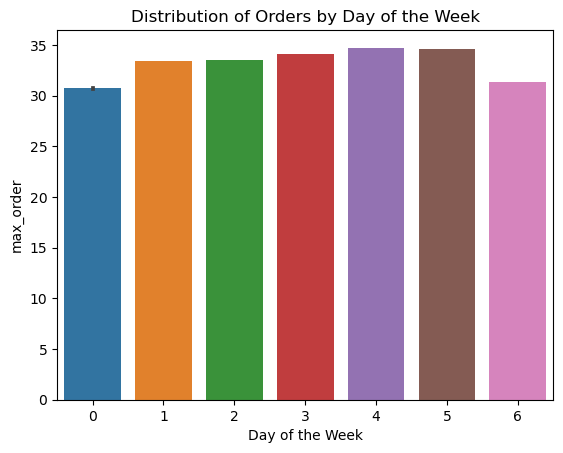

In [12]:
# Bar chart of orders_day_of_week

sns.barplot(data=combined_data_new, x="orders_day_of_week", y="max_order")  

plt.title("Distribution of Orders by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("max_order")
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_day_of_week_Bar.png'))
plt.show()

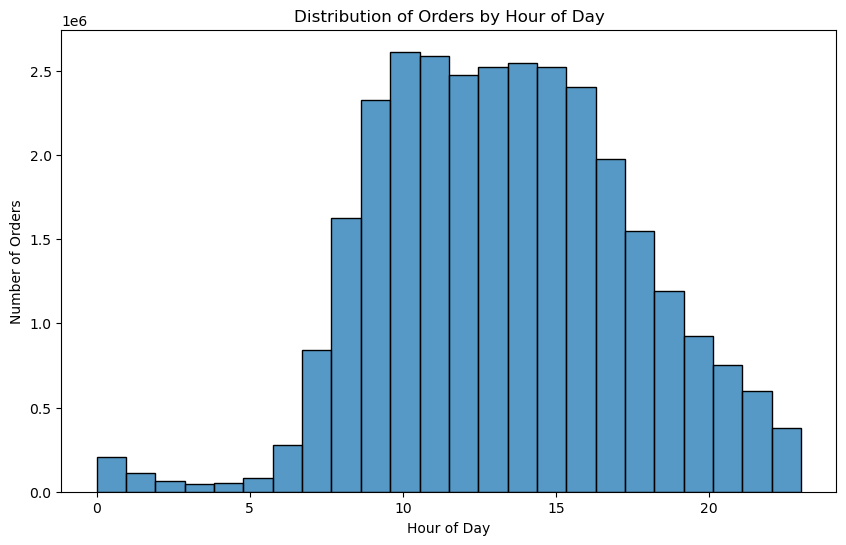

In [24]:
# Histogram of Order Hour

plt.figure(figsize=(10, 6))
sns.histplot(data=combined_data_new, x="order_hour_of_day", bins=24, kde=False)
plt.title("Distribution of Orders by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_hour_histogram.png'))
plt.show()

###  The histogram illustrates the distribution of orders made during different hours of the day. The peak order hours are around mid-morning to late afternoon, suggesting that most customers prefer to place their orders during this time.

## 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

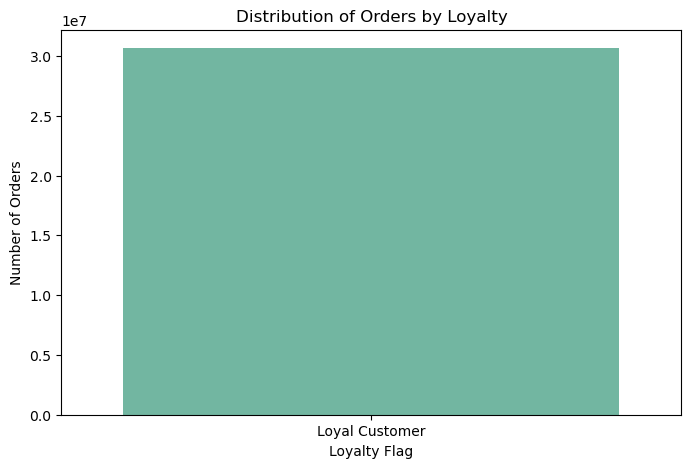

In [25]:
# Bar Chart of Loyalty

plt.figure(figsize=(8, 5))
sns.countplot(data=combined_data_new, x="loyalty_flag", palette="Set2")
plt.title("Distribution of Orders by Loyalty")
plt.xlabel("Loyalty Flag")
plt.ylabel("Number of Orders")
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_chart_loyalty.png'))
plt.show()

### The bar chart provides insights into the distribution of orders based on customer loyalty. It indicates whether customers are loyal or not. This information can help the marketing team target loyalty programs more effectively.


## 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

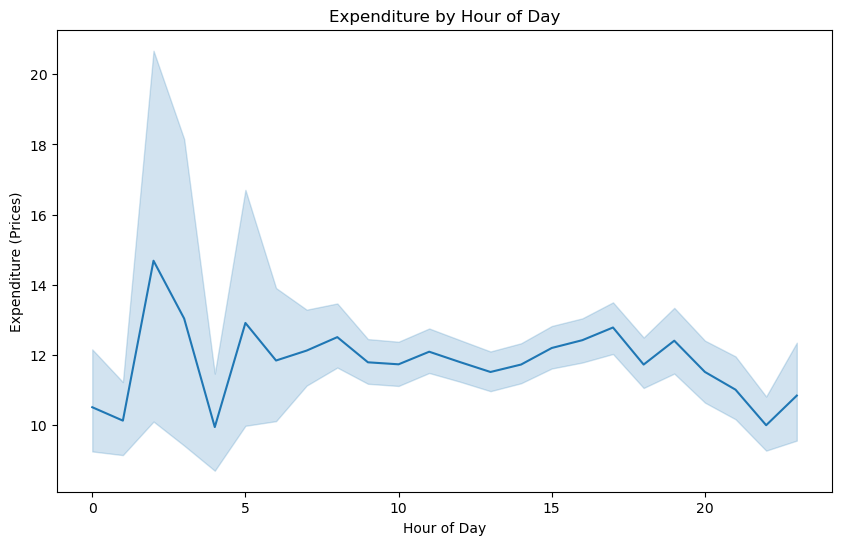

In [27]:
# Expenditure vs. Hour of Day (Line Chart)

plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_data_new, x="order_hour_of_day", y="prices")
plt.title("Expenditure by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Expenditure (Prices)")
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'expenditure_by_hour_line_chart.png'))
plt.show()

###  The line chart showcases the relationship between the hour of the day and the expenditure made by customers. It suggests that there might be variations in spending patterns throughout the day, with potential peaks during certain hours in the morning.

## 6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
### In a markdown cell beneath your line chart, describe what the line chart shows.

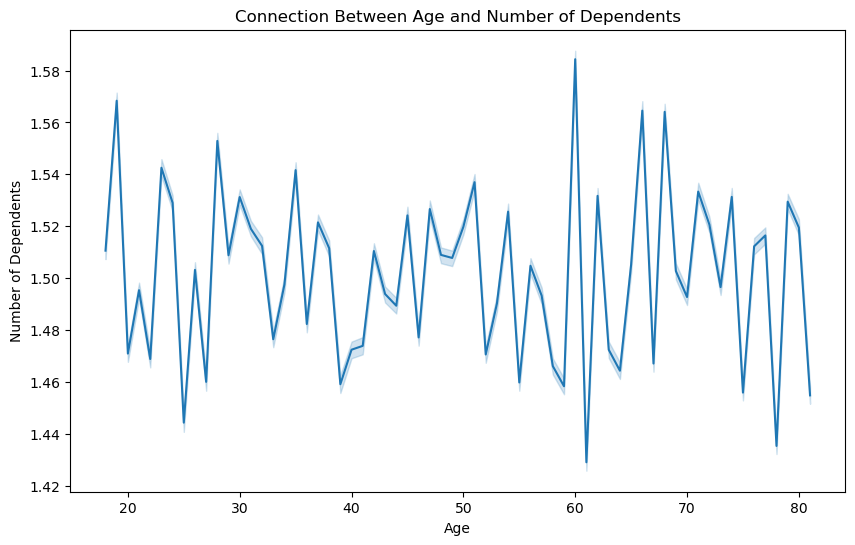

In [28]:
# Connection Between Age and Number of Dependents (Line Chart)

plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_data_new, x="Age", y="Number_of_dependants")
plt.title("Connection Between Age and Number of Dependents")
plt.xlabel("Age")
plt.ylabel("Number of Dependents")
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_dependents_line_chart.png'))
plt.show()

### The line chart explores the correlation between a customer's age and the number of dependents they have. It appears that there is a tendency for younger customers to have fewer dependents, with the number increasing as customers get older or more high peaks of the chart are portrayed as customer tend to fall under ageing groups.

## 7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
### In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

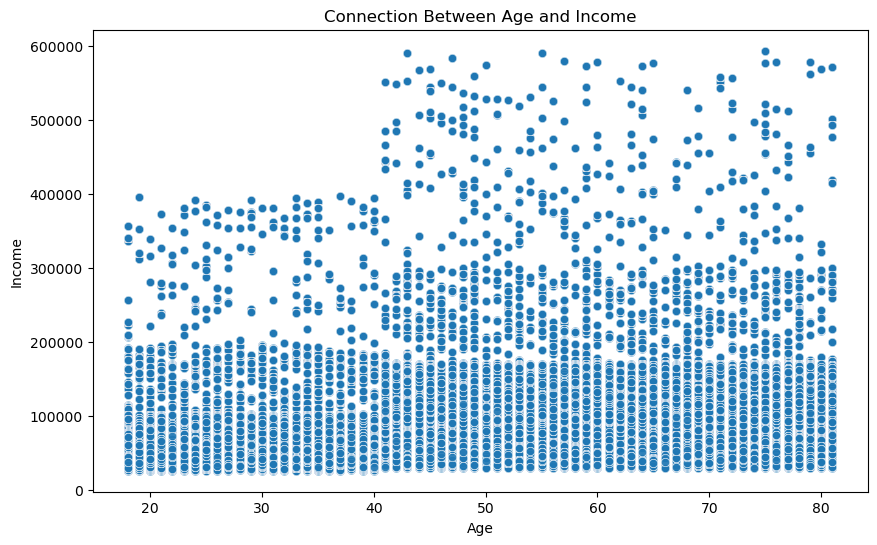

In [30]:
# Connection Between Age and Spending Power (Scatterplot)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_data_new, x="Age", y="income", alpha=0.5)
plt.title("Connection Between Age and Income")
plt.xlabel("Age")
plt.ylabel("Income")
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_income_scatterplot.png'))
plt.show()

### The scatterplot visually demonstrates the relationship between a customer's age and their income. While there isn't a clear linear correlation, there seem to be clusters of higher income customers across various age groups.

## 8 Export your visualizations as “.png” files in your relevant project folder.

### All visualizations were already exported as final data during input of their codes in the previous exercises above to project folder.